# <center> Tarea N5 <center>
## <center>Métodos Númericos</center>

Nombre: Lenin Amangandi

## Pregunta N1
Sea $$ f(x) = -x^3 - \cos x $$ y $$ p_0 = -1 $$. Use el método de Newton y de la Secante para encontrar $$ p_2 $$. ¿Se podría usar $$ p_0 = 0 $$?

In [ ]:
import math
import os
import matplotlib.pyplot as plt

def f(x):
    return -x**3 - math.cos(x)

def df(x):
    return -3*x**2 + math.sin(x)

def newton(p0, iteraciones=2):
    print("Método de Newton-Raphson:")
    for i in range(iteraciones):
        f_val = f(p0)
        df_val = df(p0)
        p1 = p0 - f_val / df_val
        print(f"Iteración {i+1}: p{i} = {p0:.6f}, f(p{i}) = {f_val:.6f}, f'(p{i}) = {df_val:.6f}, p{i+1} = {p1:.6f}")
        p0 = p1
    return p1

def secante(p0, p1, iteraciones=1):
    print("\nMétodo de la Secante:")
    for i in range(iteraciones):
        f_p0 = f(p0)
        f_p1 = f(p1)
        p2 = p1 - f_p1 * (p1 - p0) / (f_p1 - f_p0)
        print(f"Iteración {i+1}: p{i} = {p0:.6f}, p{i+1} = {p1:.6f}, p{i+2} = {p2:.6f}")
        p0, p1 = p1, p2
    return p2




In [18]:
def graficar_funcion():
    ruta = r"C:\Workspace-Metodos-Numericos-2k25A-\Tareas\Tarea5\ImagenesTarea5"
    os.makedirs(ruta, exist_ok=True)

    xs = [x / 100 for x in range(-400, 401)]
    ys = [f(x) for x in xs]

    plt.figure(figsize=(8, 5))
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.plot(xs, ys, label='f(x) = -x³ - cos(x)', color='blue')
    plt.title("Gráfica de f(x)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)

    ruta_img = os.path.join(ruta, "f_x_grafica.png")
    plt.savefig(ruta_img)

    plt.show()
    plt.close()

    

Método de Newton-Raphson:
Iteración 1: p0 = -1.000000, f(p0) = 0.459698, f'(p0) = -3.841471, p1 = -0.880333
Iteración 2: p1 = -0.880333, f(p1) = 0.045351, f'(p1) = -3.095909, p2 = -0.865684

Método de la Secante:
Iteración 1: p0 = -1.000000, p1 = -0.500000, p2 = -0.810400
Resultado Newton-Raphson: p2 = -0.865684
Resultado Secante:        p2 = -0.810400


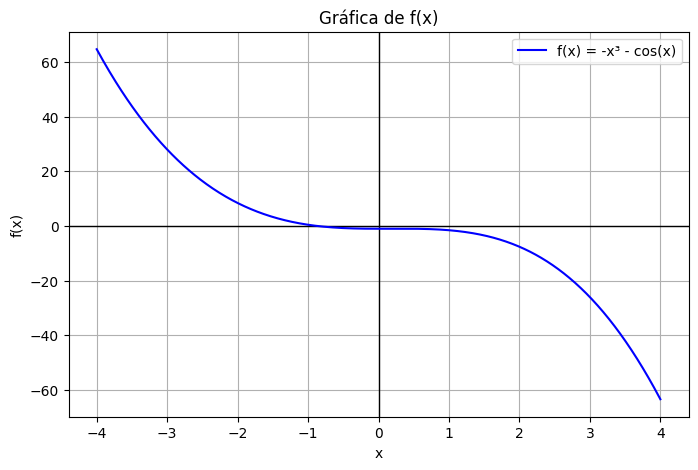

In [19]:
p0 = -1

p2_newton = newton(p0, 2)

p2_secante = secante(-1, -0.5, 1)

print(f"Resultado Newton-Raphson: p2 = {p2_newton:.6f}")
print(f"Resultado Secante:        p2 = {p2_secante:.6f}")

graficar_funcion()


In [17]:
print("\n¿Se puede usar p0 = 0?")

df_0 = df(0)
if df_0 == 0:
    print("No se puede usar p0 = 0 en Newton-Raphson porque f'(0) = 0 es una división por cero.")
else:
    print("Se puede usar p0 = 0 (f'(0) ≠ 0).")




¿Se puede usar p0 = 0?
No se puede usar p0 = 0 en Newton-Raphson porque f'(0) = 0 es una división por cero.


## Pregunta N2
Encuentre soluciones precisas dentro de $$ 10^{-4} $$ para los siguientes problemas.
   

In [31]:
import math
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display

RUTA_BASE = r"C:\Workspace-Metodos-Numericos-2k25A-\Tareas\Tarea5\ImagenesTarea5"
os.makedirs(RUTA_BASE, exist_ok=True)

def newton(f, f_deriv, p0, tol=1e-4, max_iter=1000):
    for i in range(max_iter):
        fp0 = f(p0)
        fdp0 = f_deriv(p0)
        if fdp0 == 0:
            raise ValueError("Derivada nula. No se puede continuar con Newton.")
        p = p0 - fp0 / fdp0
        if abs(p - p0) < tol:
            return p, i + 1
        p0 = p
    raise ValueError("No convergió dentro del número máximo de iteraciones.")

def secante(f, p0, p1, tol=1e-4, max_iter=1000):
    q0 = f(p0)
    q1 = f(p1)
    for i in range(max_iter):
        if q1 - q0 == 0:
            raise ValueError("División por cero en Secante.")
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        if abs(p - p1) < tol:
            return p, i + 1
        p0, p1 = p1, p
        q0, q1 = q1, f(p)
    raise ValueError("No convergió dentro del número máximo de iteraciones.")

def graficar_y_guardar(f, a, b, raiz, nombre):
    xs = [a + (b - a)*i/400.0 for i in range(401)]
    ys = [f(x) for x in xs]

    plt.figure(figsize=(7,4.5))
    plt.axhline(0, color='black', linewidth=1)
    plt.plot(xs, ys, label=f"{nombre}")
    plt.plot(raiz, f(raiz), 'ro', label=f"Raíz ≈ {raiz:.6f}")
    plt.title(f"Gráfica de {nombre}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()

    ruta_img = os.path.join(RUTA_BASE, f"{nombre.replace(' ','_')}.png")
    plt.savefig(ruta_img)
    plt.show()
    plt.close()

    return ruta_img


   a. $$ x^3 - 2x^2 - 5 = 0, \, [1,4] $$

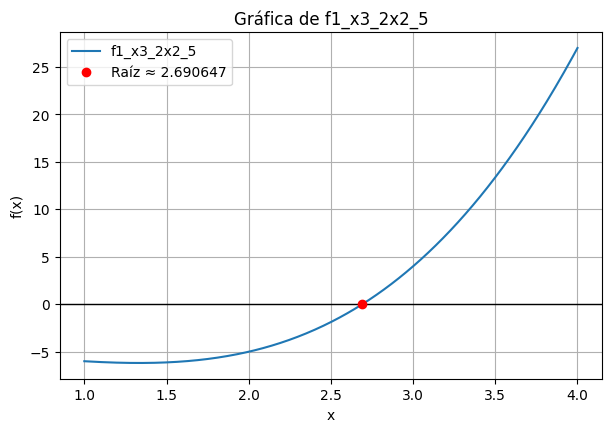

Metodo de Newton ≈ 2.690647, iteraciones = 4
Metodo de la Secante ≈ 2.690647, iteraciones = 10


In [30]:


def f1(x): return x**3 - 2*x**2 - 5
def f1_deriv(x): return 3*x**2 - 4*x

a, b = 1.0, 4.0
p0 = (a + b) / 2

raiz_n, it_n = newton(f1, f1_deriv, p0)

raiz_s, it_s = secante(f1, a, b)


ruta = graficar_y_guardar(f1, a, b, raiz_n, "f1_x3_2x2_5")


print(f"Metodo de Newton ≈ {raiz_n:.6f}, iteraciones = {it_n}")
print(f"Metodo de la Secante ≈ {raiz_s:.6f}, iteraciones = {it_s}")


   b. $$ x^3 + 3x^2 - 1 = 0, \, [-3, -2] $$

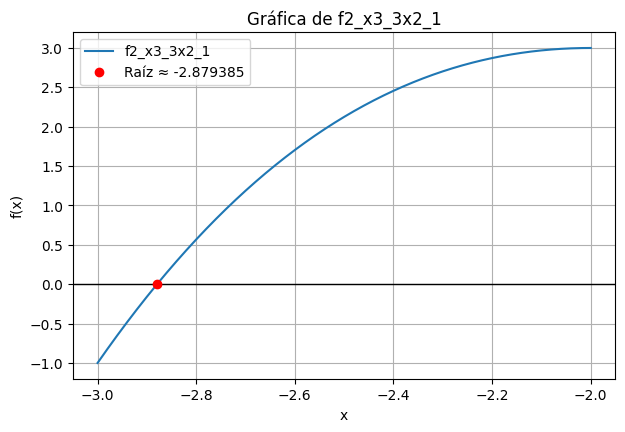

Literal (b)
Metodo de Newton ≈ -2.879385, iteraciones = 5
Metodo de la Secante ≈ -2.879385, iteraciones = 6


In [29]:
def f2(x): return x**3 + 3*x**2 - 1
def f2_deriv(x): return 3*x**2 + 6*x

a, b = -3.0, -2.0
p0 = (a + b) / 2

raiz_n, it_n = newton(f2, f2_deriv, p0)
raiz_s, it_s = secante(f2, a, b)
ruta = graficar_y_guardar(f2, a, b, raiz_n, "f2_x3_3x2_1")

print(f"Literal (b)")
print(f"Metodo de Newton ≈ {raiz_n:.6f}, iteraciones = {it_n}")
print(f"Metodo de la Secante ≈ {raiz_s:.6f}, iteraciones = {it_s}")


  c. $$ x - \cos x = 0, \, [0, \pi/2] $$
   

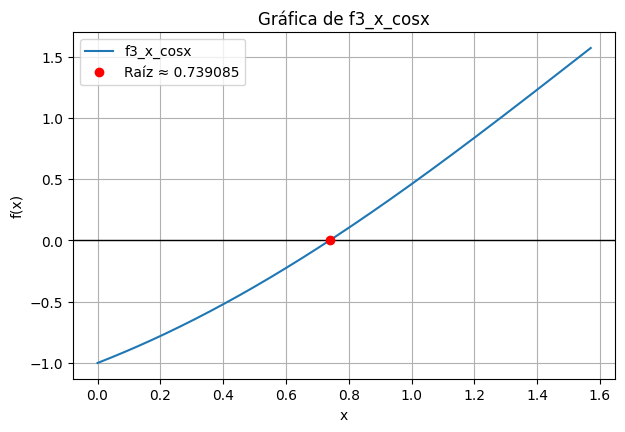

Literal (c)
Metodo de Newton ≈ 0.739085, iteraciones = 3
Metodo de la Secante ≈ 0.739085, iteraciones = 5


In [28]:
def f3(x): return x - math.cos(x)
def f3_deriv(x): return 1 + math.sin(x)

a, b = 0.0, math.pi/2
p0 = (a + b) / 2

raiz_n, it_n = newton(f3, f3_deriv, p0)
raiz_s, it_s = secante(f3, a, b)
ruta = graficar_y_guardar(f3, a, b, raiz_n, "f3_x_cosx")

print(f"Literal (c)")
print(f"Metodo de Newton ≈ {raiz_n:.6f}, iteraciones = {it_n}")
print(f"Metodo de la Secante ≈ {raiz_s:.6f}, iteraciones = {it_s}")


   d. $$ x - 0.8 - 0.2 \sin x = 0, \, [0, \pi/2] $$

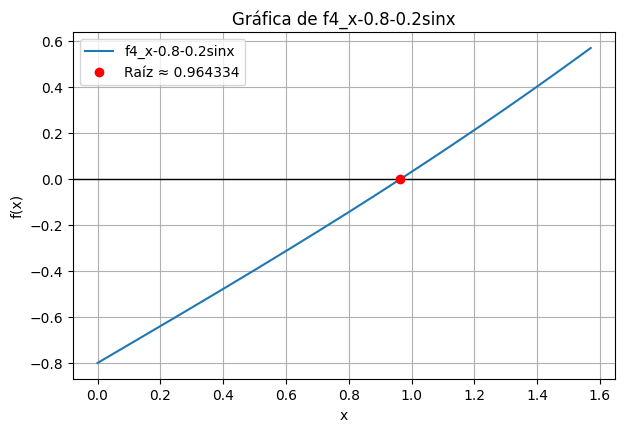

Literal (d)
Metodo de Newton ≈ 0.964334, iteraciones = 3
Metodo de la Secante ≈ 0.964334, iteraciones = 4


In [27]:
def f4(x): return x - 0.8 - 0.2*math.sin(x)
def f4_deriv(x): return 1 - 0.2*math.cos(x)
a, b = 0.0, math.pi/2
p0 = (a + b) / 2

raiz_n, it_n = newton(f4, f4_deriv, p0)
raiz_s, it_s = secante(f4, a, b)
ruta = graficar_y_guardar(f4, a, b, raiz_n, "f4_x-0.8-0.2sinx")

print(f"Literal (d)")
print(f"Metodo de Newton ≈ {raiz_n:.6f}, iteraciones = {it_n}")
print(f"Metodo de la Secante ≈ {raiz_s:.6f}, iteraciones = {it_s}")


## Pregunta 3

Use los 2 métodos en esta sección para encontrar las soluciones dentro de $$ 10^{-5} $$ para los siguientes problemas.
   

   


In [32]:
import math
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display

RUTA_BASE = r"C:\Workspace-Metodos-Numericos-2k25A-\Tareas\Tarea5\ImagenesTarea5"
os.makedirs(RUTA_BASE, exist_ok=True)

def newton(f, f_deriv, p0, tol=1e-5, max_iter=1000):
    for i in range(max_iter):
        fp0 = f(p0)
        fdp0 = f_deriv(p0)
        if fdp0 == 0:
            raise ValueError(f"Derivada nula en iteración {i}, p0 = {p0}")
        p = p0 - fp0 / fdp0
        if abs(p - p0) < tol:
            return p, i+1
        p0 = p
    raise ValueError("Newton: no convergió en el número máximo de iteraciones")

def secante(f, p0, p1, tol=1e-5, max_iter=1000):
    q0 = f(p0)
    q1 = f(p1)
    for i in range(max_iter):
        denom = (q1 - q0)
        if denom == 0:
            raise ValueError(f"Secante: división por cero en iteración {i}")
        p = p1 - q1 * (p1 - p0) / denom
        if abs(p - p1) < tol:
            return p, i+1
        p0, p1 = p1, p
        q0, q1 = q1, f(p)
    raise ValueError("Secante: no convergió en el número máximo de iteraciones")

def graficar_y_guardar(f, a, b, raiz, nombre, nx=400):
    xs = [a + (b - a)*i/nx for i in range(nx+1)]
    ys = [f(x) for x in xs]

    plt.figure(figsize=(7,4.5))
    plt.axhline(0, color='black', linewidth=1)
    plt.plot(xs, ys, label=nombre)
    plt.plot(raiz, f(raiz), 'ro', label=f"raíz ≈ {raiz:.8f}")
    plt.title(f"Gráfica de {nombre}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()

    ruta_img = os.path.join(RUTA_BASE, f"{nombre.replace(' ','_')}.png")
    plt.savefig(ruta_img)
    plt.show()
    plt.close()

    return ruta_img


   a. $$ 3x - e^x = 0 $$ para $$ 1 \leq x \leq 2 $$

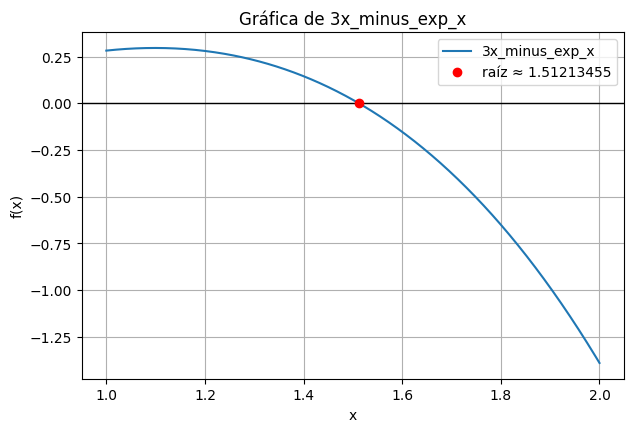

Resultado literal (a) con tol = 1e-05
  Newton:  raiz ≈ 1.51213455, iter = 3, |f(raiz)| = 1.24e-14
  Secante: raiz ≈ 1.51213455, iter = 9, |f(raiz)| = 1.60e-10


In [ ]:
def fa(x): return 3*x - math.exp(x)
def fa_deriv(x): return 3 - math.exp(x)

a, b = 1.0, 2.0
tol = 1e-5

p0_newton = (a + b)/2.0
try:
    raiz_newton_a, it_newton_a = newton(fa, fa_deriv, p0_newton, tol=tol)
    residuo_newton_a = abs(fa(raiz_newton_a))
except Exception as e:
    raiz_newton_a, it_newton_a, residuo_newton_a = None, None, None
    print("Newton (a) error:", e)

try:
    raiz_secante_a, it_secante_a = secante(fa, a, b, tol=tol)
    residuo_secante_a = abs(fa(raiz_secante_a))
except Exception as e:
    raiz_secante_a, it_secante_a, residuo_secante_a = None, None, None
    print("Secante (a) error:", e)

raiz_para_graf = raiz_newton_a if raiz_newton_a is not None else raiz_secante_a
ruta_a = None
if raiz_para_graf is not None:
    ruta_a = graficar_y_guardar(fa, a, b, raiz_para_graf, "3x_minus_exp_x")

print("Resultado literal (a) con tol =", tol)
if raiz_newton_a is not None:
    print(f"  Newton:  raiz ≈ {raiz_newton_a:.8f}, iter = {it_newton_a}, |f(raiz)| = {residuo_newton_a:.2e}")
else:
    print("  Newton:  no convergió")

if raiz_secante_a is not None:
    print(f"  Secante: raiz ≈ {raiz_secante_a:.8f}, iter = {it_secante_a}, |f(raiz)| = {residuo_secante_a:.2e}")
else:
    print("  Secante: no convergió")


   b. $$ 2x + 3 \cos x - e^x = 0 $$ para $$ 1 \leq x \leq 2 $$

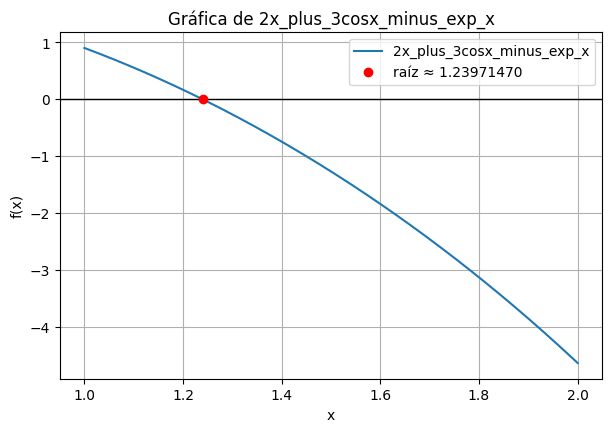

Resultado literal (b) con tol = 1e-05
  Newton:  raiz ≈ 1.23971470, iter = 4, |f(raiz)| = 1.60e-14
  Secante: raiz ≈ 1.23971470, iter = 6, |f(raiz)| = 1.53e-13


In [ ]:

def fb(x): return 2*x + 3*math.cos(x) - math.exp(x)
def fb_deriv(x): return 2 - 3*math.sin(x) - math.exp(x)

a, b = 1.0, 2.0
tol = 1e-5

p0_newton = (a + b)/2.0
try:
    raiz_newton_b, it_newton_b = newton(fb, fb_deriv, p0_newton, tol=tol)
    residuo_newton_b = abs(fb(raiz_newton_b))
except Exception as e:
    raiz_newton_b, it_newton_b, residuo_newton_b = None, None, None
    print("Newton (b) error:", e)

try:
    raiz_secante_b, it_secante_b = secante(fb, a, b, tol=tol)
    residuo_secante_b = abs(fb(raiz_secante_b))
except Exception as e:
    raiz_secante_b, it_secante_b, residuo_secante_b = None, None, None
    print("Secante (b) error:", e)


raiz_para_graf = raiz_newton_b if raiz_newton_b is not None else raiz_secante_b
ruta_b = None
if raiz_para_graf is not None:
    ruta_b = graficar_y_guardar(fb, a, b, raiz_para_graf, "2x_plus_3cosx_minus_exp_x")


print("Resultado literal (b) con tol =", tol)
if raiz_newton_b is not None:
    print(f"  Newton:  raiz ≈ {raiz_newton_b:.8f}, iter = {it_newton_b}, |f(raiz)| = {residuo_newton_b:.2e}")
else:
    print("  Newton:  no convergió")

if raiz_secante_b is not None:
    print(f"  Secante: raiz ≈ {raiz_secante_b:.8f}, iter = {it_secante_b}, |f(raiz)| = {residuo_secante_b:.2e}")
else:
    print("  Secante: no convergió")

## Pregunta N4

El polinomio de cuarto grado

$$ f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9 $$

Ceros reales en: $$ [-1,0]\ \text{y}\ [0,1]$$

Aproximar con precisión: $$10^{-6}$$



In [36]:
import math, os
import matplotlib.pyplot as plt
from IPython.display import Image, display

RUTA_BASE = r"C:\Workspace-Metodos-Numericos-2k25A-\Tareas\Tarea5\ImagenesTarea5"
os.makedirs(RUTA_BASE, exist_ok=True)

def f(x):
    return 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9

def df(x):
    return 920*x**3 + 54*x**2 + 18*x - 221

def newton(f, f_deriv, p0, tol=1e-6, max_iter=1000):
    p = p0
    for i in range(1, max_iter+1):
        fp = f(p); fdp = f_deriv(p)
        if fdp == 0:
            raise ZeroDivisionError("Derivada cero.")
        p_new = p - fp/fdp
        if abs(p_new - p) < tol:
            return p_new, i, abs(f(p_new))
        p = p_new
    raise ValueError("Newton: no convergió")

def secante(f, p0, p1, tol=1e-6, max_iter=1000):
    q0 = f(p0); q1 = f(p1)
    for i in range(1, max_iter+1):
        denom = q1 - q0
        if denom == 0:
            raise ZeroDivisionError("Secante: división por cero.")
        p = p1 - q1*(p1 - p0)/denom
        if abs(p - p1) < tol:
            return p, i, abs(f(p))
        p0, p1 = p1, p
        q0, q1 = q1, f(p)
    raise ValueError("Secante: no convergió")

def graficar_guardar(f, a, b, raiz, nombre):
    xs = [a + (b-a)*i/400.0 for i in range(401)]
    ys = [f(x) for x in xs]
    plt.figure(figsize=(7,4))
    plt.axhline(0, linewidth=1)
    plt.plot(xs, ys)
    plt.plot(raiz, f(raiz), 'o')
    plt.title(nombre)
    plt.xlabel("x"); plt.ylabel("f(x)")
    plt.grid(True)
    ruta = os.path.join(RUTA_BASE, f"{nombre.replace(' ','_')}.png")
    plt.savefig(ruta); plt.show(); plt.close()
    return ruta


a) Método de la secante (extremos como estimaciones iniciales)  

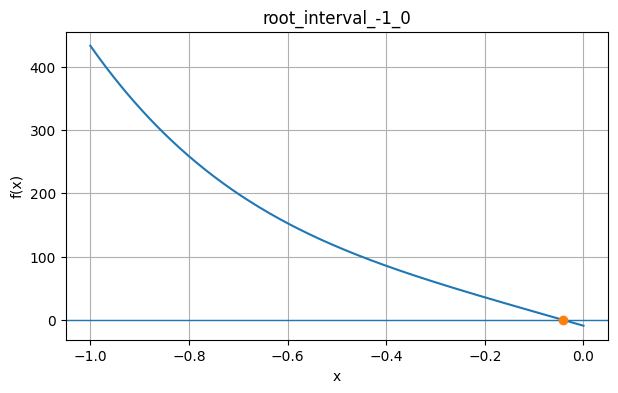

Intervalo [-1,0]
 Secante: raíz = -0.040659288316, iter = 4, |f(raíz)| = 7.48e-12
 Newton:  raíz = -0.040659288316, iter = 4, |f(raíz)| = 2.84e-14


In [38]:
a, b = -1.0, 0.0
raiz_s, it_s, res_s = secante(f, a, b, tol=1e-6)
p0 = (a+b)/2.0
raiz_n, it_n, res_n = newton(f, df, p0, tol=1e-6)

ruta = graficar_guardar(f, a, b, raiz_n, "root_interval_-1_0")

print("Intervalo [-1,0]")
print(f" Secante: raíz = {raiz_s:.12f}, iter = {it_s}, |f(raíz)| = {res_s:.2e}")
print(f" Newton:  raíz = {raiz_n:.12f}, iter = {it_n}, |f(raíz)| = {res_n:.2e}")


b) Método de Newton (punto medio como estimación inicial)

In [40]:
a, b = 0.0, 1.0

raiz_s_01, it_s_01, res_s_01 = secante(f, a, b, tol=1e-6)
raiz_n_01, it_n_01, res_n_01 = newton(f, df, (a+b)/2.0, tol=1e-6)

print("Usando p0=0.5 (Newton) y extremos (0,1) (Secante):")
print(f" Secante(0,1) -> raíz = {raiz_s_01:.12f}, iter = {it_s_01}, |f| = {res_s_01:.2e}")
print(f" Newton(0.5)  -> raíz = {raiz_n_01:.12f}, iter = {it_n_01}, |f| = {res_n_01:.2e}")


Usando p0=0.5 (Newton) y extremos (0,1) (Secante):
 Secante(0,1) -> raíz = -0.040659288316, iter = 11, |f| = 4.15e-11
 Newton(0.5)  -> raíz = -0.040659288316, iter = 6, |f| = 1.78e-15


## Pregunta N5

La función 
$$
f(x) = \tan(\pi x) - 6,\ \text{cero en } \frac{1}{\pi}\arctan(6) \approx 0.447431543
$$

Sea:
$$
x_0 = 0,\ \quad x_1 = 0.48
$$

¿Cuál método es más eficaz y por qué?

In [64]:
import math

def f(x):
    return math.tan(math.pi * x) - 6

def df(x):
    return math.pi / (math.cos(math.pi * x) ** 2)

x_exacta = 0.447431543

a_bis = 0
b_bis = 0.48
x0_newton = 0.0
x0_secante = 0.0
x1_secante = 0.48


- Método de bisección

In [65]:
def biseccion(f, a, b, iteraciones=10):
    for _ in range(iteraciones):
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    error_rel = abs((c - x_exacta)/x_exacta) * 100
    return c, error_rel

res_bis, err_bis = biseccion(f, a_bis, b_bis)
print(f"Bisección: x = {res_bis:.10f}")


Bisección: x = 0.4476562500


- Método de Newton

In [68]:
import math

def f(x):
    return math.tan(math.pi * x) - 6

def df(x):
    return math.pi / (math.cos(math.pi * x) ** 2)

x_exacta = 0.447431543

a_bis = 0
b_bis = 0.48

def biseccion(f, a, b, iteraciones=10):
    for _ in range(iteraciones):
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c

x0_newton = biseccion(f, a_bis, b_bis)

def newton(f, df, x0, iteraciones=10):
    x = x0
    for _ in range(iteraciones):
        x = x - f(x)/df(x)
    error_rel = abs((x - x_exacta)/x_exacta) * 100
    return x, error_rel

res_newton, err_newton = newton(f, df, x0_newton)
print(f"Newton: x = {res_newton:.10f}")



Newton: x = 0.4474315433


- Método de la secante

In [67]:
def secante(f, x0, x1, iteraciones=10):
    for _ in range(iteraciones):
        x2 = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))
        x0, x1 = x1, x2
    error_rel = abs((x2 - x_exacta)/x_exacta) * 100
    return x2, error_rel

# Ejecutar Secante
res_secante, err_secante = secante(f, x0_secante, x1_secante)
print(f"Secante: x = {res_secante:.10f}")


Secante: x = -2989.9400375314


¿Cuál método es más eficaz y por qué?

El método más efectivo es el de Newton, porque converge mucho más rápido que los otros métodos cuando se inicia cerca de la raíz. Mientras que la bisección siempre converge pero de forma lenta y la secante también es rápida pero depende de buenos puntos iniciales, Newton logra alcanzar la raíz con muy pocas iteraciones y un error prácticamente nulo, siempre que el punto inicial esté dentro de un intervalo seguro que contenga la raíz.

## Pregunta 6
$$f(x) = \ln(x^2 + 1) - e^{0.4x}\cos(\pi x)$$

a) Determine el único cero negativo con precisión:
$$10^{-6}$$

b) Determine los cuatro ceros positivos más pequeños con precisión:
$$10^{-6}$$

c) Encuentre una aproximación inicial para el enésimo cero positivo más pequeño.  
d) Determine el vigesimoquinto cero positivo más pequeño con precisión:
$$10^{-6}$$

In [71]:
import math

# Función
def f(x):
    return math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x)

# Precisión deseada
tol = 1e-6


In [72]:
# Intervalo que contiene el cero negativo
a, b = -1, 0

while (b - a)/2 > tol:
    c = (a + b)/2
    if f(a)*f(c) < 0:
        b = c
    else:
        a = c

cero_neg = (a + b)/2
print(f"Cero negativo: x ≈ {cero_neg:.6f}")


Cero negativo: x ≈ -0.434142


In [73]:
ceros_positivos = []
n = 0  # empezamos desde x=0
while len(ceros_positivos) < 4:
    a = n
    b = n + 1
    if f(a)*f(b) < 0:
        # Bisección
        while (b - a)/2 > tol:
            c = (a + b)/2
            if f(a)*f(c) < 0:
                b = c
            else:
                a = c
        ceros_positivos.append((a + b)/2)
    n += 1

for i, x in enumerate(ceros_positivos, 1):
    print(f"Cero positivo {i}: x ≈ {x:.6f}")


Cero positivo 1: x ≈ 0.450656
Cero positivo 2: x ≈ 1.744739
Cero positivo 3: x ≈ 2.238320
Cero positivo 4: x ≈ 3.709041


In [ ]:
def aproximacion_enesimo_cero(n):
    return n - 0.5

n = 25
x_aprox_25 = aproximacion_enesimo_cero(n)
print(f"Aproximación inicial para el {n}º cero positivo: x ≈ {x_aprox_25:.6f}")


Aproximación inicial para el 25º cero positivo: x ≈ 24.500000


In [ ]:
a = x_aprox_25 - 0.1
b = x_aprox_25 + 0.1

while (b - a)/2 > tol:
    c = (a + b)/2
    if f(a)*f(c) < 0:
        b = c
    else:
        a = c

cero_25 = (a + b)/2
print(f"25º cero positivo: x ≈ {cero_25:.6f}")


25º cero positivo: x ≈ 24.499886
